# Multilayer perceptron

In [1]:
!pip install nltk
!pip install numpy
!pip install pandas
!pip install keras
!pip install matplotlib
!pip install tensorflow

## Introduction to Keras

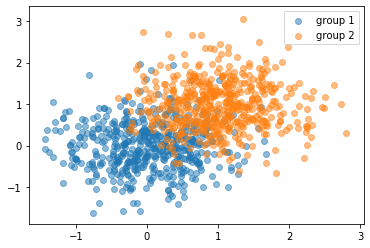

In [2]:
# a simple classificaiton task

import numpy as np
import matplotlib.pyplot as plt

N = 500
np.random.seed(43897)
group1 = np.random.normal(loc=0.0, scale=0.6, size=[N, 2])
group2 = np.random.normal(loc=1, scale=0.6, size=[N, 2])

plt.scatter(group1[:,0], group1[:, 1], label="group 1", alpha=0.5)
plt.scatter(group2[:,0], group2[:, 1], label="group 2", alpha=0.5)
plt.legend()
plt.show()

In [3]:
shuffle_idx = np.random.permutation(2*N)
X = np.vstack((group1, group2))[shuffle_idx]
y = np.vstack((np.hstack((np.ones([N, 1]), np.zeros([N, 1]))), 
              np.hstack((np.zeros([N, 1]), np.ones([N, 1])))) )[shuffle_idx]

print("size of all dataset", X.shape, y.shape)
train_X = X[:int(2*N*0.8), :]
train_y = y[:int(2*N*0.8), :]
dev_X = X[int(2*N*0.8):int(2*N*0.9), :]
dev_y = y[int(2*N*0.8):int(2*N*0.9), :]
test_X = X[int(2*N*0.9):, :]
test_y = y[int(2*N*0.9):, :]
print("size of training set: {}, size of dev set: {}, size of test set:{}.".format(train_X.shape, dev_X.shape, test_X.shape))

size of all dataset (1000, 2) (1000, 2)
size of training set: (800, 2), size of dev set: (100, 2), size of test set:(100, 2).


Perceptron model

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

from keras.callbacks import ModelCheckpoint
import os
if not os.path.exists("models/"):
    os.mkdir("models")
    
checkpoint_path = "models/weights.hdf5"    
checkpointer = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_best_only=True)

learning_rate = 0.1

output_size = 2 # num_class
input_size = 2 # num dimension

model = Sequential()
model.add(Dense(output_size, input_shape=(input_size,), activation="softmax"))

model.compile(loss="binary_crossentropy", 
              optimizer=SGD(lr=learning_rate), 
              metrics=["accuracy"])

model.fit(train_X, train_y, epochs=10, batch_size=10, verbose=0,
         validation_data=(dev_X, dev_y), callbacks=[checkpointer])

loss_train, accuracy_train = model.evaluate(train_X, train_y)

print("acc of training set = {:.2f}".format(accuracy_train))

loss_test, accuracy_test = model.evaluate(test_X, test_y)
print("acc of testing set = {:.2f}".format(accuracy_test))

model.load_weights(checkpoint_path)

loss_test, accuracy_test = model.evaluate(test_X, test_y)
print("acc of testing set = {:.2f}".format(accuracy_test))


Epoch 00001: val_loss improved from inf to 0.38596, saving model to models\weights.hdf5

Epoch 00002: val_loss improved from 0.38596 to 0.34370, saving model to models\weights.hdf5

Epoch 00003: val_loss improved from 0.34370 to 0.32824, saving model to models\weights.hdf5

Epoch 00004: val_loss improved from 0.32824 to 0.32406, saving model to models\weights.hdf5

Epoch 00005: val_loss did not improve from 0.32406

Epoch 00006: val_loss improved from 0.32406 to 0.32141, saving model to models\weights.hdf5

Epoch 00007: val_loss improved from 0.32141 to 0.31910, saving model to models\weights.hdf5

Epoch 00008: val_loss improved from 0.31910 to 0.31846, saving model to models\weights.hdf5

Epoch 00009: val_loss did not improve from 0.31846

Epoch 00010: val_loss did not improve from 0.31846
25/25 [==============================] - 0s 718us/step - loss: 0.2704 - accuracy: 0.8850
acc of training set = 0.88
4/4 [==============================] - 0s 749us/step - loss: 0.2728 - accuracy: 0

## Get the prediciton results

In [5]:
Y_pred = model.predict_classes(test_X, batch_size=10, verbose=0)
print(Y_pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0]


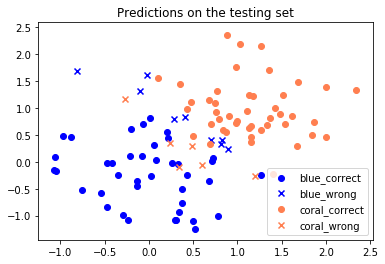

In [6]:
# visialization
# edgecolors
correct_x = [[], []]
wrong_x = [[], []]

for i, (y, y_) in enumerate(zip(Y_pred, test_y)):
    y_ = np.argmax(y_)
    if y == y_:
        correct_x[y_].append(test_X[i])
    else:
        wrong_x[y_].append(test_X[i])
plt.scatter(np.array(correct_x[0])[:, 0], np.array(correct_x[0])[:, 1], color="blue", label="blue_correct")
plt.scatter(np.array(wrong_x[0])[:, 0], np.array(wrong_x[0])[:, 1], color="blue", marker="x", label="blue_wrong")
plt.scatter(np.array(correct_x[1])[:, 0], np.array(correct_x[1])[:, 1], color="coral", label="coral_correct")
plt.scatter(np.array(wrong_x[1])[:, 0], np.array(wrong_x[1])[:, 1], color="coral", marker="x", label="coral_wrong")
plt.title("Predictions on the testing set")
plt.legend()
plt.show()

## Multilayer perceptron in NLP. Text classification

Input features: 1-gram BOW of a sentence.

Output: class

Model: single layer perceptron and 2-layer perceptron

In [ ]:
import numpy as np
from scipy import sparse
from collections import Counter
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd

stopwords = set(stopwords.words("english"))

def load_data(file_name):
    df = pd.read_csv(file_name)

    return df['id'], df["text"], df['label']

def load_labels(file_name):
    return pd.read_csv(file_name)['label']

def tokenize(text):
    return nltk.word_tokenize(text)

def filter_stopwords(tokens):
    return [token for token in tokens if token not in stopwords and not token.isnumeric()]

def get_bagofwords(data, vocab_dict):
    data_matrix = sparse.lil_matrix((len(data), len(vocab_dict)))

    for i, doc in enumerate(data):
        for word in doc:
            word_idx = vocab_dict.get(word, -1)
            if word_idx != -1:
                data_matrix[i, word_idx] += 1
    data_matrix = data_matrix.tocsr()
    
    return data_matrix

In [ ]:
# Transform the labels to logits

num_class = 5

train_labels = np.zeros((len(train_ids), num_class))
train_labels[(list(range(len(train_ids))), list(train_labels_raw-1))] = 1

test_labels = np.zeros((len(test_ids), num_class))
test_labels[(list(range(len(test_ids))), list(load_labels(ans_file)-1))] = 1

In [ ]:
# Tokenization
train_tokens = [tokenize(text) for text in train_texts] 
test_tokens = [tokenize(text) for text in test_texts]
# Stop words removal
train_tokens = [filter_stopwords(tokens) for tokens in train_tokens]
test_tokens = [filter_stopwords(tokens) for tokens in test_tokens]
# use a set data structure to hold all words appearing in the train set
vocab = set()
for i, doc in enumerate(train_tokens):# enumerate over each document in the train set
    # enumerate over each word in the document
    for word in doc:
        # if this word has been added into the set before, 
        # then it will be ignored, otherwise, it will be 
        # added into the set.
        vocab.add(word)
# create a dictionary from the set of words, where the
# keys are word strings and the values are numerical indices
vocab_dict = dict(zip(vocab, range(len(vocab))))
print('Size of vocab: ', len(vocab_dict))

In [ ]:
train_data_matrix = get_bagofwords(train_tokens, vocab_dict)
test_data_matrix = get_bagofwords(test_tokens, vocab_dict)

## Model

Single layer model

In [ ]:
learning_rate = 0.1

model_single_layer = Sequential()
model_single_layer.add(Dense(num_class, input_shape=(len(vocab_dict),), activation="softmax"))

model_single_layer.compile(loss="binary_crossentropy", 
              optimizer=SGD(lr=learning_rate), 
              metrics=["accuracy"])

In [ ]:
model_single_layer.fit(train_data_matrix, train_labels, epochs=20, batch_size=100, verbose=1)

loss_train, accuracy_train = model_single_layer.evaluate(train_data_matrix, train_labels)
print("acc of training set = {:.2f}".format(accuracy_train))

In [ ]:
loss_test, accuracy_test = model_single_layer.evaluate(test_data_matrix, test_labels)
print("acc of testing set = {:.4f}".format(accuracy_test))

Two layers model

In [ ]:
learning_rate = 0.1

model_two_layer = Sequential()
model_two_layer.add(Dense(len(vocab_dict), input_shape=(len(vocab_dict),), activation="relu"))

model_two_layer.add(Dense(num_class, input_shape=(len(vocab_dict),), activation="softmax"))

model_two_layer.compile(loss="binary_crossentropy", 
              optimizer=SGD(lr=learning_rate), 
              metrics=["accuracy"])

model_two_layer.fit(train_data_matrix, train_labels, epochs=30, batch_size=100, verbose=1)

loss_test, accuracy_test = model_two_layer.evaluate(test_data_matrix, test_labels)
print("acc of testing set = {:.4f}".format(accuracy_test))

## Parameter tunning

In [ ]:
# parameter tuning

for batch_size in [5, 10, 100]:
    learning_rate = 0.1

    model_single_layer = Sequential()
    model_single_layer.add(Dense(num_class, input_shape=(len(vocab_dict),), activation="softmax"))

    model_single_layer.compile(loss="binary_crossentropy", 
                  optimizer=SGD(lr=learning_rate), 
                  metrics=["accuracy"])

    train_history = model_single_layer.fit(train_data_matrix, 
                                           train_labels, 
                                           epochs=20, 
                                           batch_size=batch_size, 
                                           verbose=0,
                                           validation_data=(test_data_matrix, test_labels)
                                           )

#     loss = train_history.history['loss']
    val_loss = train_history.history['val_loss']
#     plt.plot(loss, )
    plt.plot(val_loss, label="b_s:{}".format(batch_size))
plt.legend()
plt.show()

When run the program, we can see that batch size 100 has the best performance